In [1]:
#  imports and helper functions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=float)

y = np.array([[0], [1], [1], [0]], dtype=float) 

# Activation and derivatives
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_derivative(a):
    # a is sigmoid(z)
    return a * (1 - a)

# Utility for predictions
def predict(X, params):
    W1, b1, W2, b2 = params
    z1 = X.dot(W1) + b1  
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2  
    a2 = sigmoid(z2)
    return a2


In [8]:
#  initialize network hyperparameters
np.random.seed(42)  # reproducible

n_input = 2
n_hidden = 3    # minimum to solve XOR
n_output = 1

# small random weights
W1 = np.random.randn(n_input, n_hidden) * 0.5
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, n_output) * 0.5
b2 = np.zeros((1, n_output))

# hyperparameters
lr = 0.5         # learning rate 
epochs = 10000
report_every = 1000

params = (W1, b1, W2, b2)


In [9]:
# training loop
W1, b1, W2, b2 = params
loss_history = []

for epoch in range(1, epochs + 1):
    # Forward pass
    z1 = X.dot(W1) + b1      # (4, n_hidden)
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2     # (4, 1)
    a2 = sigmoid(z2)         # predictions (4,1)

    # Compute loss (mean squared error)
    loss = np.mean((y - a2) ** 2)
    loss_history.append(loss)

    # Backpropagation (vectorized)
    # output layer error
    delta2 = (a2 - y) * sigmoid_derivative(a2)  # (4,1)

    # hidden layer error
    delta1 = delta2.dot(W2.T) * sigmoid_derivative(a1)  # (4,n_hidden)

    # Gradients (batch)
    dW2 = a1.T.dot(delta2) / X.shape[0]    # (n_hidden,1)
    db2 = np.mean(delta2, axis=0, keepdims=True)  # (1,1)
    dW1 = X.T.dot(delta1) / X.shape[0]     # (n_input,n_hidden)
    db1 = np.mean(delta1, axis=0, keepdims=True)  # (1,n_hidden)

    # Update weights
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    # Report
    if epoch % report_every == 0 or epoch == 1:
        preds = (a2 > 0.5).astype(int).flatten()
        acc = np.mean(preds == y.flatten())
        print(f"Epoch {epoch:5d}  Loss: {loss:.6f}  Accuracy: {acc*100:.1f}%")

# store back
params = (W1, b1, W2, b2)
print("Training finished.")


Epoch     1  Loss: 0.267582  Accuracy: 50.0%
Epoch  1000  Loss: 0.244933  Accuracy: 75.0%
Epoch  2000  Loss: 0.198015  Accuracy: 75.0%
Epoch  3000  Loss: 0.094034  Accuracy: 100.0%
Epoch  4000  Loss: 0.019346  Accuracy: 100.0%
Epoch  5000  Loss: 0.008497  Accuracy: 100.0%
Epoch  6000  Loss: 0.005176  Accuracy: 100.0%
Epoch  7000  Loss: 0.003652  Accuracy: 100.0%
Epoch  8000  Loss: 0.002796  Accuracy: 100.0%
Epoch  9000  Loss: 0.002253  Accuracy: 100.0%
Epoch 10000  Loss: 0.001880  Accuracy: 100.0%
Training finished.


In [10]:
#  evaluate final network
a2 = predict(X, params)
preds = (a2 > 0.5).astype(int)
print("Inputs:\n", X)
print("Predicted probabilities:\n", np.round(a2, 4))
print("Predicted classes:\n", preds.flatten())
print("True classes:\n", y.flatten().astype(int))

accuracy = np.mean(preds.flatten() == y.flatten()) * 100
print(f"Final accuracy: {accuracy:.1f}%")


Inputs:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Predicted probabilities:
 [[0.0451]
 [0.9582]
 [0.9583]
 [0.0447]]
Predicted classes:
 [0 1 1 0]
True classes:
 [0 1 1 0]
Final accuracy: 100.0%


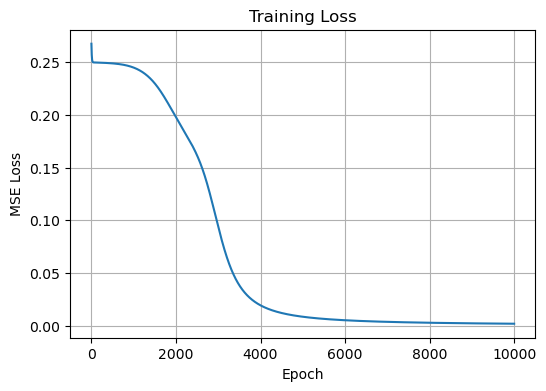

In [11]:
# plot loss curve
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss")
plt.grid(True)
plt.show()
